## Importing Libraries

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # For saving the model


## Loading the dataset

In [43]:
# Load the dataset
csv_path = "data/Flavia_features.csv"  # Update the path as necessary
data = pd.read_csv(csv_path)

# Display first few rows of the dataset
data.head()

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,0,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,0,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


## Exploratory Data Analysis (EDA)

Column names: Index(['Unnamed: 0', 'area', 'perimeter', 'physiological_length',
       'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity',
       'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b',
       'contrast', 'correlation', 'inverse_difference_moments', 'entropy'],
      dtype='object')
Missing Values in Dataset:
 Unnamed: 0                    0
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
dtype: int64

Label Distribution:
 5.272300    2
1.688689    1
2.0

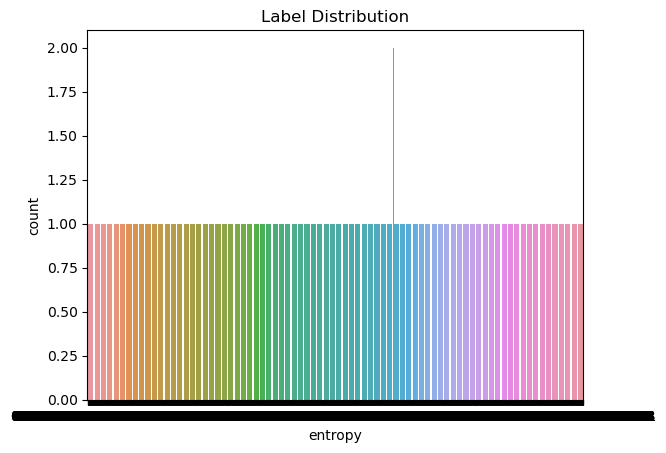

In [44]:
print("Column names:", data.columns)

# Check for missing values
print("Missing Values in Dataset:\n", data.isnull().sum())

# Displaying the distribution of the label (after identifying correct label column name)
label_column_name = "entropy"  
print("\nLabel Distribution:\n", data[label_column_name].value_counts())

# Statistical summary of the dataset
print("\nStatistical Summary:\n", data.describe())

# Visualizing the distribution of the labels
sns.countplot(x=label_column_name, data=data)
plt.title('Label Distribution')
plt.show()

## Data Preprocessing

In [45]:
# Define the target variable based on aspect_ratio
# Classify aspect ratios greater than 2 as class 1, otherwise class 0
data['label'] = (data['aspect_ratio'] > 2).astype(int)

# Split features (X) and target (y)
X = data.drop("label", axis=1)
y = data["label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel="rbf", C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9808027923211169


## Model Training

In [46]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel="rbf", C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## Model Evaluation

Model Accuracy: 0.9808027923211169

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.95      0.92      0.94        88

    accuracy                           0.98       573
   macro avg       0.97      0.96      0.96       573
weighted avg       0.98      0.98      0.98       573


Confusion Matrix:
 [[481   4]
 [  7  81]]


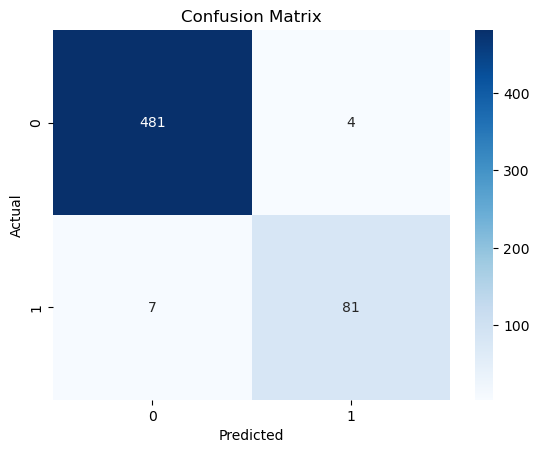

In [47]:
# Predict the labels on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Findings and Accuracy

In [48]:
# Displaying the findings
findings = f"""
Model Accuracy: {accuracy}
Classification Report:
{classification_report(y_test, y_pred)}

Confusion Matrix:
{conf_matrix}
"""

print(findings)

# Save the findings to a text file
with open("model_findings.txt", "w") as f:
    f.write(findings)



Model Accuracy: 0.9808027923211169
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.95      0.92      0.94        88

    accuracy                           0.98       573
   macro avg       0.97      0.96      0.96       573
weighted avg       0.98      0.98      0.98       573


Confusion Matrix:
[[481   4]
 [  7  81]]



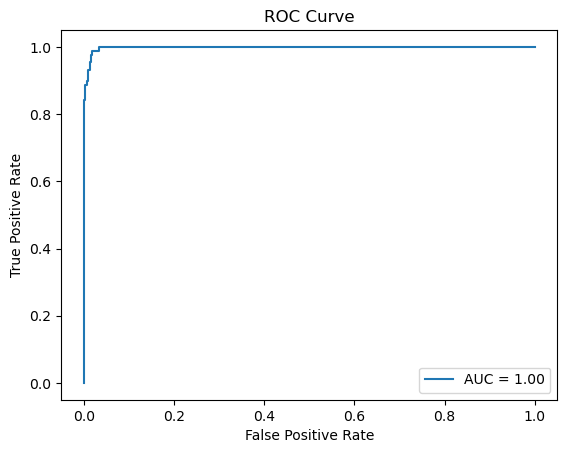

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Feature Importance Analysis

### Using PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.4133076  0.18196879]


### Permutational Feature Importance

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.4133076  0.18196879]
